In [1]:
!pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 8.6 MB/s 


In [2]:
# Import library
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

rating_df = pd.read_csv("https://raw.githubusercontent.com/Bangkit-Booker-Project/MachineLearning/main/Dataset/rating_dataset.csv")
book_data = pd.read_csv("https://raw.githubusercontent.com/Bangkit-Booker-Project/MachineLearning/main/Dataset/book_dataset.csv")

In [3]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = rating_df['userId'].unique().tolist()
print('list userID: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [276747, 278843, 4017, 8961, 21788, 26883, 34987, 37227, 52584, 86548, 88123, 96357, 110382, 135149, 147528, 158583, 163467, 164323, 164956, 201697, 202277, 208287, 224220, 231838, 237776, 246634, 249228, 249746, 6073, 11676, 13947, 30511, 62464, 84537, 92853, 121596, 139462, 142479, 159854, 182676, 186848, 208570, 221655, 225986, 226950, 226965, 234288, 276755, 99, 5268, 9652, 11629, 16634, 16782, 21404, 22625, 28204, 33179, 34222, 38281, 48025, 55075, 59712, 66591, 67515, 68156, 74208, 78783, 79942, 81394, 82102, 86145, 87141, 93179, 94985, 95921, 96634, 103377, 106225, 114089, 114216, 114988, 120082, 120350, 125878, 126296, 132303, 133935, 135776, 138139, 140294, 141210, 142121, 149908, 155117, 156150, 163851, 164675, 170154, 172096, 172512, 172539, 172742, 178254, 188685, 189279, 190831, 191728, 192479, 193920, 194016, 196585, 198011, 199515, 199649, 204790, 205571, 206417, 207339, 207727, 209229, 214252, 216010, 217740, 223156, 228579, 231857, 234530, 243117, 243951,

In [4]:
# Mengubah placeID menjadi list tanpa nilai yang sama
books_ids = book_data['ISBN'].unique().tolist()
 
# Melakukan proses encoding placeID
book_to_book_encoded = {x: i for i, x in enumerate(books_ids)}
 
# Melakukan proses encoding angka ke placeID
book_encoded_to_book = {i: x for i, x in enumerate(books_ids)}

In [5]:
# Mapping userID ke dataframe user
rating_df['user'] = rating_df['userId'].map(user_to_user_encoded)
 
# Mapping placeID ke dataframe resto
rating_df['books'] = rating_df['ISBN'].map(book_to_book_encoded)
book_data['books'] = book_data['ISBN'].map(book_to_book_encoded)
book_data

,bookTitle,bookRating,ISBN,bookAuthor,yearOfPublication,Publisher,url,bookImage,bookDesc,ratingCount,bookPages,bookGenres,bookGenre1,bookGenre2,bookGenre3,books
0,To Kill a Mockingbird,4.28,446310786,Harper Lee,1988,Little Brown &amp,https://www.goodreads.com/book/show/2657.To_Ki...,https://i.gr-assets.com/images/S/compressed.ph...,The unforgettable novel of a childhood in a sl...,4772918,324 pages,"['Classics', 'Fiction', 'Historical-Historical...",Classics,Fiction,Historical-HistoricalFiction,0
1,Pride and Prejudice,4.27,055321215X,Jane Austen,1983,Bantam,https://www.goodreads.com/book/show/44623850-p...,https://i.gr-assets.com/images/S/compressed.ph...,an alternate cover edition can be found hereIn...,3206208,446 pages,"['Classics', 'Fiction', 'Romance', 'Historical...",Classics,Fiction,Romance,1
2,Animal Farm,3.96,451526341,George Orwell,2004,Signet,https://www.goodreads.com/book/show/14060211-a...,https://i.gr-assets.com/images/S/compressed.ph...,This remarkable book has been described in man...,2927053,95 pages,"['Classics', 'Fiction', 'ScienceFiction-Dystop...",Classics,Fiction,ScienceFiction-Dystopia,2
3,Gone with the Wind,4.30,446365386,Margaret Mitchell,1993,Warner Books,https://www.goodreads.com/book/show/18405.Gone...,https://i.gr-assets.com/images/S/compressed.ph...,"Scarlett O'Hara, the beautiful, spoiled daught...",1106466,1037 pages,"['Classics', 'Historical-HistoricalFiction', '...",Classics,Historical-HistoricalFiction,Fiction,3
4,The Giving Tree,4.37,60256664,Shel Silverstein,1964,HarperCollins,https://www.goodreads.com/book/show/370493.The...,https://i.gr-assets.com/images/S/compressed.ph...,"""Once there was a tree...and she loved a littl...",952487,64 pages,"['Childrens', 'Childrens-PictureBooks', 'Class...",Childrens,Childrens-PictureBooks,Classics,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,There Are Doors,3.64,312872305,Gene Wolfe,2001,Orb Books,https://www.goodreads.com/book/show/666601.The...,https://i.gr-assets.com/images/S/compressed.ph...,There Are Doors is the story of a man who fall...,1053,313 pages,"['Fantasy', 'ScienceFiction', 'Fiction', 'Scie...",Fantasy,ScienceFiction,Fiction,1531
1532,Tar Baby,3.95,452264790,Toni Morrison,1987,Plume Books,https://www.goodreads.com/book/show/11359.Tar_...,https://i.gr-assets.com/images/S/compressed.ph...,Ravishingly beautiful and emotionally incendia...,18405,320 pages,"['Fiction', 'Classics', 'Cultural-AfricanAmeri...",Fiction,Classics,Cultural-AfricanAmerican,1532
1533,Loser,3.74,60001933,Jerry Spinelli,2002,Joanna Cotler,https://www.goodreads.com/book/show/87220.Loser,https://i.gr-assets.com/images/S/compressed.ph...,From renowned Newbery-winning author Jerry Spi...,19044,218 pages,"['Fiction', 'RealisticFiction', 'YoungAdult', ...",Fiction,RealisticFiction,YoungAdult,1533
1534,The Return of the Prodigal Son: A Story of Hom...,4.33,385473079,Henri J.M. Nouwen,1994,Image,https://www.goodreads.com/book/show/175113.The...,https://i.gr-assets.com/images/S/compressed.ph...,A chance encounter with a reproduction of Remb...,18897,160 pages,"['Christian', 'Spirituality', 'Religion', 'Rel...",Christian,Spirituality,Religion,1534


In [6]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah resto
num_book = len(book_encoded_to_book)
print(num_book)
 
# Mengubah rating menjadi nilai float
rating_df['bookRating'] = rating_df['bookRating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(rating_df['bookRating'])
 
# Nilai maksimal rating
max_rating = max(rating_df['bookRating'])
 
print('Number of User: {}, Number of Books: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

11536
1536
Number of User: 11536, Number of Books: 1536, Min Rating: 0.5, Max Rating: 5.0


In [7]:
# Mengacak dataset
df = rating_df.sample(frac=1, random_state=42)
df

,userId,ISBN,bookRating,bookTitle,user,books
12618,247887,031205436X,2.5,Generation X: Tales for an Accelerated Culture,7921,629
14848,26084,440222656,2.5,The Horse Whisperer,675,250
7739,178914,743211383,2.5,Dreamcatcher,5490,451
1807,194606,452282152,4.5,Girl with a Pearl Earring,1655,75
20354,242781,067179938X,4.5,Son of the Morning,11051,1438
...,...,...,...,...,...,...
11964,193572,553268880,4.0,The Prince of Tides,7620,98
21575,112001,380769840,5.0,Ashes in the Wind,1045,1057
5390,174757,385324057,4.0,Summer Sisters,4159,717
860,123544,886773741,5.0,Tailchaser's Song,832,1107


In [8]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'books']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['bookRating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)


[[7921  629]
 [ 675  250]
 [5490  451]
 ...
 [4159  717]
 [ 832 1107]
 [3582 1158]] [0.44444444 0.44444444 0.44444444 ... 0.77777778 1.         0.88888889]


In [9]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-3)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings resto
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-3)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [10]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model


# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(1e-3),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [11]:
# Memulai training 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 10,
    validation_data = (x_val, y_val)
)


Epoch 1/10
546/546 [==============================] - 5s 8ms/step - loss: 0.6908 - root_mean_squared_error: 0.3122 - val_loss: 0.6608 - val_root_mean_squared_error: 0.2829
Epoch 2/10
546/546 [==============================] - 4s 8ms/step - loss: 0.6362 - root_mean_squared_error: 0.2336 - val_loss: 0.6320 - val_root_mean_squared_error: 0.2183
Epoch 3/10
546/546 [==============================] - 5s 9ms/step - loss: 0.6145 - root_mean_squared_error: 0.2112 - val_loss: 0.6215 - val_root_mean_squared_error: 0.2197
Epoch 4/10
546/546 [==============================] - 6s 11ms/step - loss: 0.6039 - root_mean_squared_error: 0.2065 - val_loss: 0.6148 - val_root_mean_squared_error: 0.2178
Epoch 5/10
546/546 [==============================] - 6s 11ms/step - loss: 0.5933 - root_mean_squared_error: 0.2018 - val_loss: 0.6069 - val_root_mean_squared_error: 0.2164
Epoch 6/10
546/546 [==============================] - 6s 12ms/step - loss: 0.5843 - root_mean_squared_error: 0.1982 - val_loss: 0.5979 - v

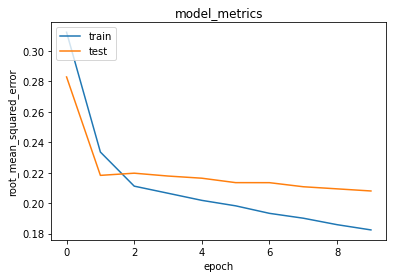

In [12]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
df['user'].value_counts()

29       264
725       59
393       52
2122      50
748       43
        ... 
1385       1
7924       1
11379      1
10158      1
4159       1
Name: user, Length: 11536, dtype: int64

In [14]:
# # Mengubah userID menjadi list tanpa nilai yang sama
# user_ids = rating_df['userId'].unique().tolist()
 
# # Melakukan encoding userID
#user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
 
# # Melakukan proses encoding angka ke ke userID
#user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

# # Mengubah placeID menjadi list tanpa nilai yang sama
#books_ids = book_data['ISBN'].unique().tolist()
 
# # Melakukan proses encoding placeID
#book_to_book_encoded = {x: i for i, x in enumerate(books_ids)}
 
# # Melakukan proses encoding angka ke placeID
#book_encoded_to_book = {i: x for i, x in enumerate(books_ids)}

#user_id = rating_df.userId.sample(1).iloc[0] #mengambil data user

# Mengambil data user yang sudah diencode (pada dataset kolom user)
user_encoder = rating_df.user.sample(1).iloc[0]

# Menentukan buku yang sudah dibaca user
books_have_been_read_by_user = rating_df[rating_df.user == user_encoder]
print(len(books_have_been_read_by_user))
 
# Menentukan buku yang belum dibaca user
books_have_not_been_read_by_user = book_data[~book_data['books'].isin(books_have_been_read_by_user['books'].values)]['books'] 
print(len(books_have_not_been_read_by_user))

# Mengambil data ISBN yang sudah diencode (pada dataset kolom book)
ISBN_encoder = book_data.books.iloc[0:]

# List data ISBN yang telah diencode pada buku yang dibelum dibaca user
book_list = [[ISBN_encoder.get(x)] for x in books_have_not_been_read_by_user ]

user_book_array = np.hstack(
    ([[user_encoder]] * len(book_list), book_list)
)
user_book_array

# # book_to_book_encoded.keys()
# # books_have_not_been_read_by_user = list(
# #     set(books_have_not_been_read_by_user)
# #     .intersection(set(book_to_book_encoded.keys()))
# # ) 
# # books_have_not_been_read_by_user

# #books_have_not_been_read_by_user = [[book_to_book_encoded.get(x)] for x in books_have_not_been_read_by_user] #list of book encoding

# #user_encode = user_to_user_encoded.get(user_id)

# user_book_array = np.hstack(
#     ([[user_encode]] * len(books_have_not_been_read_by_user), books_have_not_been_read_by_user)
# )
# user_book_array

2
1534


array([[5137,    0],
       [5137,    1],
       [5137,    3],
       ...,
       [5137, 1533],
       [5137, 1534],
       [5137, 1535]])

In [23]:
ratings = model.predict(user_book_array).flatten()
 
# Menentukan top rating buku
top_ratings_indices = ratings.argsort()[-10:][::-1]

#recommended_book_id = [book_encoded_to_book.get(books_have_not_been_read_by_user[x][0]) for x in top_ratings_indices]

# Mengambil data ISBN 
ISBN = book_data.ISBN.iloc[0:]

# List data ISBN pada top rating buku
recommended_book_ids  = [ISBN.get(book_list[x][0]) for x in top_ratings_indices]
 
top_books_recommended = (
    books_have_been_read_by_user.sort_values(
        by = 'bookRating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

# Menentukan buku yang sudah dibaca user
books_row = book_data[book_data['ISBN'].isin(top_books_recommended)]

# Menampilkan buku yang sudah dibaca user
for row in books_row.itertuples():
    print(row.bookTitle, ':', row.bookAuthor, ':', row.bookGenres)
 
print('----' * 8)
print('Top 10 Book Recommendation for user: {}'.format(user_encoder))
print('----' * 8)

# Menentukan buku yang direkomendasikan untuk user
recommended_books = book_data[book_data['ISBN'].isin(recommended_book_ids)]

# Menampilkan buku yang direkomendasikan untuk user
for row in recommended_books.itertuples():
    print(row.bookTitle, ':', row.bookAuthor, ':', row.bookGenres)

Animal Farm : George Orwell : ['Classics', 'Fiction', 'ScienceFiction-Dystopia', 'Fantasy', 'Literature', 'Politics', 'Academic-School', 'ScienceFiction', 'Novels', 'Academic-ReadForSchool']
The Basketball Diaries : Jim Carroll : ['Nonfiction', 'Autobiography-Memoir', 'Biography', 'Thriller', 'Drama', 'Biography-Autobiography', 'Suspense', 'Mystery', 'Dark', 'BiographyMemoir']
--------------------------------
Top 10 Book Recommendation for user: 5137
--------------------------------
To Kill a Mockingbird : Harper Lee : ['Classics', 'Fiction', 'Historical-HistoricalFiction', 'Academic-School', 'Literature', 'YoungAdult', 'Historical', 'Novels', 'Academic-ReadForSchool', 'YoungAdult-HighSchool']
The Da Vinci Code : Dan Brown : ['Fiction', 'Mystery', 'Thriller', 'Suspense', 'Thriller-MysteryThriller', 'Historical-HistoricalFiction', 'Adventure', 'Novels', 'Mystery-Crime', 'Adult']
The Handmaid's Tale : Margaret Atwood : ['Fiction', 'Classics', 'ScienceFiction-Dystopia', 'ScienceFiction', 

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import pickle
# dump : put the data of the object in a file
with open('model', 'wb') as f:
  pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://35f707e5-5a18-4d4b-902b-e0d87311c7a2/assets
